<a href="https://colab.research.google.com/github/gbarcia/data_science_practice/blob/main/NotebookPotential%2BCustomers%2BPrediction%5BGerardo_Barcia%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerardo Barcia Palacios

May 2023


---



# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [438]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [439]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [440]:
df = pd.read_csv('/content/drive/MyDrive/MIT Data Science/Elective Project/ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [441]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [442]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

* There are 4612 observations and 15 columns in the dataset.

* All the columns have 4612 non-null values, so there are no missing values in the data.

In [444]:
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observations:** 

* ID is an identifier and is unique, so we can drop this column due to not adding any value. 

* This data set has 10 categorical data columns and 4 continuous data columns.

* current_ocupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral and status are categorical data, according to de number of unique values in each column. 

* age, website_visits, time_spent_on_web_site and page_wiews_per_visit are continuos data. 

In [445]:
# Dropping the ID column
df = df.drop(['ID'] , axis = 1)

In [446]:
# Creating numerical columns
num_cols = ['age', 'website_visits','time_spent_on_website','page_views_per_visit']

# Creating categorical variables
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed',
            'last_activity','print_media_type1','print_media_type2', 'digital_media',
            'educational_channels','referral','status']

## Exploratory Data Analysis (EDA)

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Univariate analysis of numerical columns**

In [447]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


**Observations:**

* **Average potential lead person age is 46**. It has a high range, from 18 years to 63, indicating high age diversity in people looking for online education. However, **~50% of the people are between 50 and 60 years old**. The more senior the people, the more interested in online learning. That could make sense since people of that age need to balance work and education. Online education could be a great alternative to them. 

* **Web Site Visits average is almost 4 times** (3.5). Almost 75% of the Visits are below 5 times. There is a big difference between the 3rd quartile value (around 5 times) and the maximum value (30 times). It is an indication of possible outliers. 

* **Time spent on the website has an average of 724 ~ 12 minutes**. The unit could be in seconds. The time spent on the website can vary a lot.

* **The average number of views per visit average is 3**. There are some outliers, given the fact that the maximum is 18. 

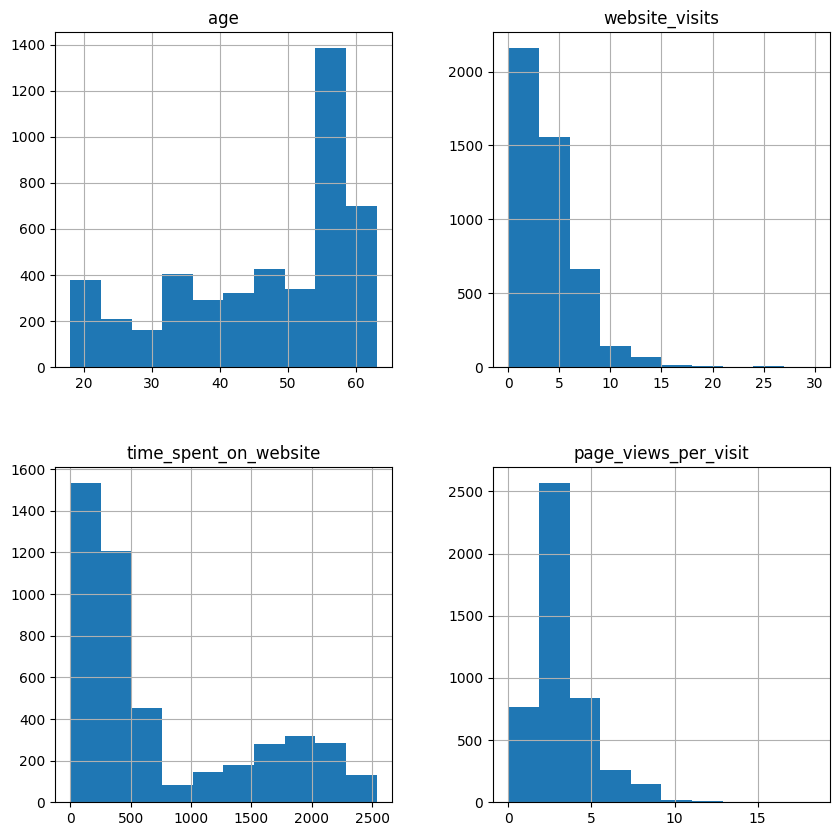

In [448]:
# Creating histograms
df[num_cols].hist(figsize = (10, 10))

plt.show()

**Observations:**

* **The age of the people interested in online education is skewed to the left**, which means the senior the people, the more interested in online education. 

* **Web visits and page view per visit distributions are skewed to the right**. This means that the majority of people interested in online education back to the page a few times and also visit a few pages. 

* **Time Spent on the website can be considered skewed to the right**. But there are some groups of people that spend much more time than the average though. 



**Univariate analysis for categorical variables**

In [449]:
for col in cat_cols:
    print(df[col].value_counts(normalize = True))
    
    print('-' * 50)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
--------------------------------------------------
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
--------------------------------------------------
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
--------------------------------------------------
No     0.84

**Observations:**

* **The dataset has ~30% of the leads converted into paid students**. The other ~70% are people with the status indicating that they were not converted.

* **56% of the people are professionals with a job position**. 31%, in contrast, are people unemployed. However, both seem to be part of the total addressable market since the students(just 12%) are the minority. 

* **The first iteraction are divided** by Web( ~55%) and Mobile( ~45).Both are equally important.

* The great majority of people complete their profiles totally( ~50%) o partially( ~49%). Just a few people do not complete the profile. All of this makes sense because the dataset is well-completed.

* **The preferred last activity seems to be the email by far( 49%)**, followed by phone ( ~27%) and through the website ( ~24%). 

* **Neither Magazines nor Referrals, Digital Platforms, educational channels and Newspapers seem to be working correctly.** Just Educational Channels( ~15%), Digital Media ( ~11%), and Newspappers( ~10%) look better. More work is needed in all of these channels. 

**Bivariate and Multivariate analysis**

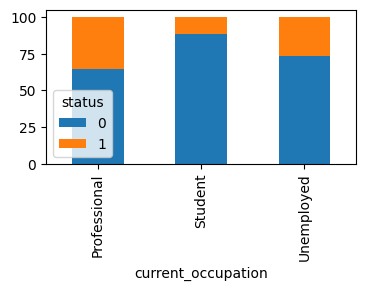

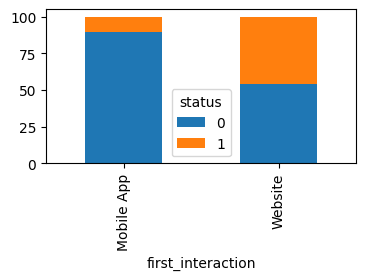

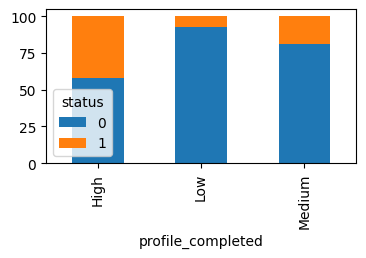

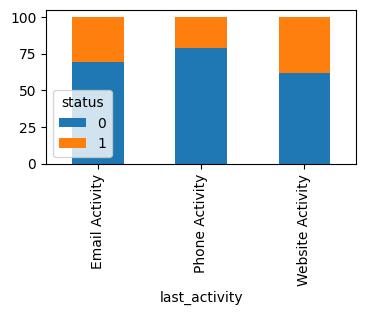

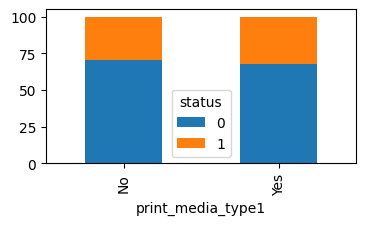

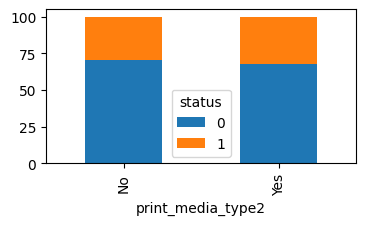

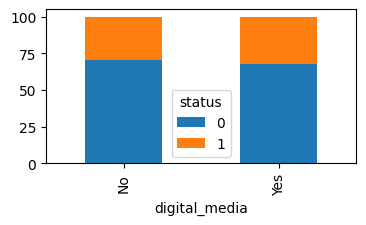

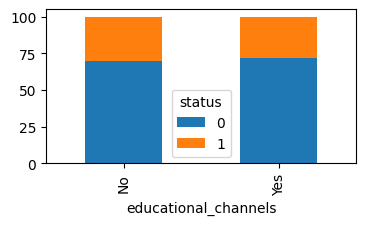

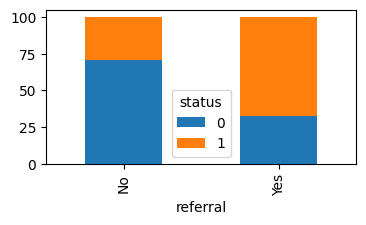

In [450]:
for col in cat_cols:
    if col != 'status':
        (pd.crosstab(df[col], df['status'], normalize = 'index')*100).plot(kind = 'bar', figsize = (4, 2), stacked = True)

**Observations:**

* ExtraaLearn could **take advantage of those potential leads that have a professional occupation**, followed by unemployed and students. The latter mentioned may need to be assessed with a different approach. 

* **Website seems to obtain better results** at the first interactions with the potential leads. The mobile approach could be analyzed and perhaps improved.

* It looks like **the more complete the profile, the better chance to convert**. The company should make a retrospective to get feedback for people that not completed the profile to improve. 

* Magazines, Digital Platforms, educational channels, and Newspapers have an equal chance to convert. However, **Referrals could have a high chance of converting** even when people have not used them. Perhaps the company needs to potentiate that. 


**Relationship between Status and Numerical variables**

In [451]:
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


**Observations:**

* People that are converted spend more time visiting the web. The company could look for UX(User Experience) improvements to try that people spend more time on the site.

* It does not look like Web visits and Pages Views per visit help to convert users. 

<Axes: >

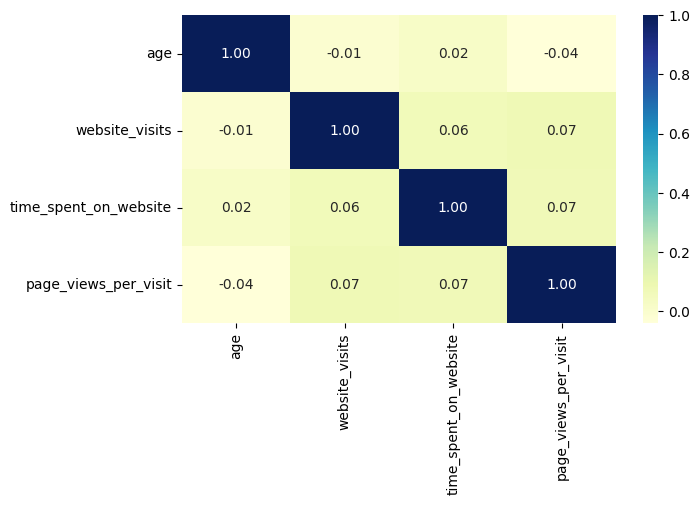

In [452]:
plt.figure(figsize = (7, 4))

sns.heatmap(df[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

**Observations:**

* There are not significant correlations between different numerical variables

# **Summary of EDA**

**Answers to principal questions**

1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.


 > > 56% of the people are professionals with a job position. 31%, in contrast, are people unemployed. However, both seem to be part of the total addressable market since the students(just 12%) are the minority. 

---

ExtraaLearn could take advantage of those potential leads that have a professional occupation, followed by unemployed and students. The latter mentioned may need to be assessed with a different approach.

---


2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 

> > The first iteraction are divided** by Web( ~55%) and Mobile( ~45).Both are equally important. However, Website seems to obtain better results at the first interactions with the potential leads. The mobile approach could be analyzed and perhaps improved. In addition, Referrals could have a high chance of converting even when people have not used them.


---



3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 


>> Based on this study email is the most effective means of communication with a percentage of 49%, followed by phone at approximately 27%, and website interaction at around 24%. A focus group with users could be insightful to get feedback. 

---


4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

> > Neither Magazines nor Referrals, Digital Platforms, educational channels and Newspapers seem to be working correctly. Just Educational Channels( ~15%), Digital Media ( ~11%), and Newspappers( ~10%) look better. More work is needed in all of these channels.

---


5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

> > It looks like the more complete the profile, the better chance to convert. The company should make a retrospective to get feedback for people that not completed the profile to improve. The great majority of people complete their profiles totally( ~50%) o partially( ~49%). Just a few people do not complete the profile. All of this makes sense because the dataset is well-completed.

## Data Preprocessing



**Outliers Detection**

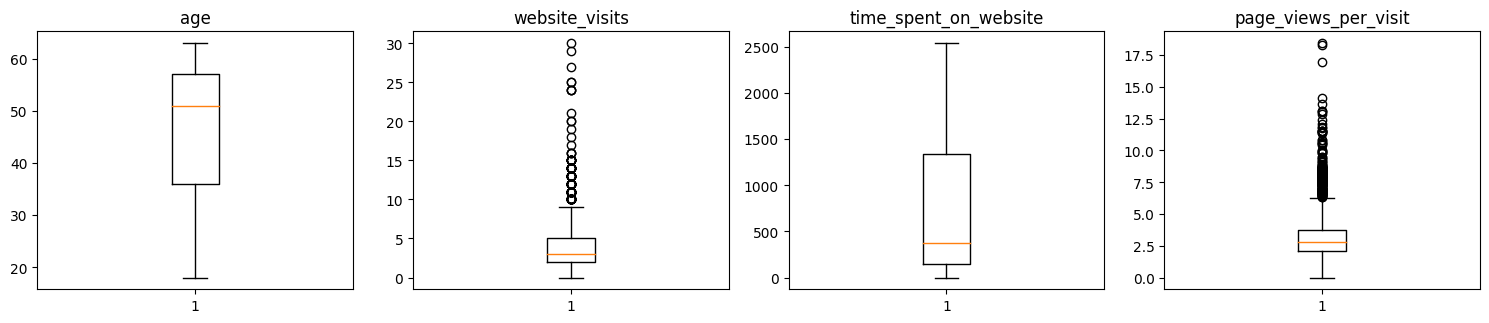

In [453]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:

* Website visits and page views per visit have outliers. 

Just a heads up, I attempted to run the models without the outliers, however it did not result in any improvements. Additionally, it would have resulted in a loss of approximately 3% of the data. Therefore, I have decided to discard this approach, but I have left the code commented for future reference.

In [454]:
#Q1 = df['website_visits'].quantile(0.25)
#Q3 = df['website_visits'].quantile(0.75)
#IQR = Q3 - Q1
#lower = Q1 - 1.5*IQR
#upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
#upper_array = np.where(df['website_visits']>=upper)[0]
#lower_array = np.where(df['website_visits']<=lower)[0]
 
# Removing the outliers
#df.drop(index=upper_array, inplace=True)
#df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
#print("New Shape: ", df.shape)

In [455]:
#Q1 = df['page_views_per_visit'].quantile(0.25)
#Q3 = df['page_views_per_visit'].quantile(0.75)
#IQR = Q3 - Q1
#lower = Q1 - 1.5*IQR
#upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
#upper_array = np.where(df['page_views_per_visit']>=upper)[0]
#lower_array = np.where(df['page_views_per_visit']<=lower)[0]
 
# Removing the outliers
#try:
  #df.drop(index=upper_array, inplace=True)
  #df.drop(index=lower_array, inplace=True)
#except Exception:
  #pass 
 
# Print the new shape of the DataFrame
#print("New Shape: ", df.shape)

**Data preparation**

Creating dummy variables for the categorical variables

In [456]:
# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping the others ones
print_media_type1_map = {'Yes': 1, 'No': 0}
print_media_type2_map = {'Yes': 1, 'No': 0}
digital_media_map = {'Yes': 1, 'No': 0}
educational_channels_map = {'Yes': 1, 'No': 0}
referral_map = {'Yes': 1, 'No': 0}

df['print_media_type1'] = df.print_media_type1.map(print_media_type1_map)
df['print_media_type2'] = df.print_media_type2.map(print_media_type2_map)
df['digital_media'] = df.digital_media.map(digital_media_map)
df['educational_channels'] = df.educational_channels.map(educational_channels_map)
df['referral'] = df.referral.map(referral_map)

Separating the independent variables (X) and the dependent variable (Y)

In [457]:
Y = df.status

X = df.drop(['status'], axis = 1)

Splitting the data into 70% train and 30% test set

In [458]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

**Some re-utilizable methods to evaluate performance of trees and random forest**

In [459]:
def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [460]:
def model_performance_classification(model, predictors, target):
  
    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

## Building a Decision Tree model

In [461]:
dt = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1) # 0.3 and 0.7 represent the opossite of the imbalance

In [462]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

## Model Performance evaluation and improvement

**Model evaluation criteria**

It's possible for a model to make incorrect predictions, such as predicting that a lead won't become a paying customer when they actually do, or vice versa. However, it's crucial to consider which scenario is more significant. If we wrongly predict that a lead won't convert, and they actually would have, the company could miss out on a valuable customer. On the other hand, if we predict a lead will convert, but they don't, the company may waste resources on a false-positive case. Ultimately, losing a potential customer is a greater loss. To minimize this risk, We should aim to maximize their Recall score, which reduces the chances of False Negatives.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



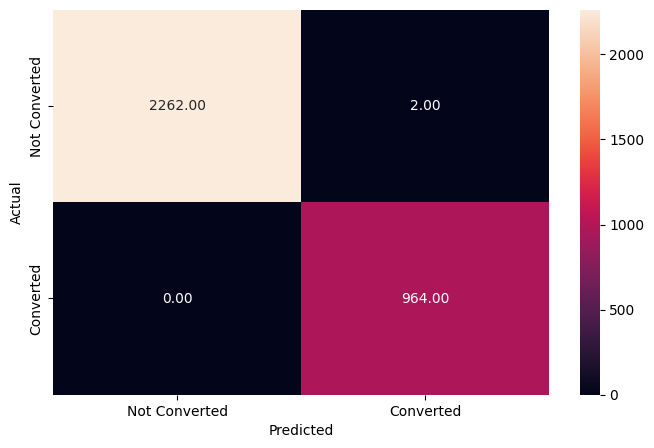

In [463]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.65      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.79      0.79      0.79      1384



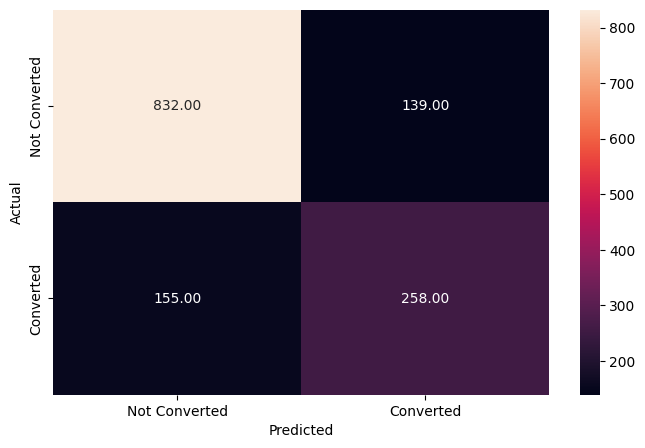

In [464]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [465]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.746416,0.740773,0.787572


**Observations:**

* The Decision Tree performs effectively on the training data but struggles on the test data, resulting in a recall of only 0.62 compared to 1 on the training dataset. This indicates that the Decision Tree is overfitted to the training data.
Furthermore, the precision of the test data reveals that there is a 38% (1-0.62) risk of the model erroneously predicting that a potential lead will convert when they will not. This could lead to the company wasting resources on leads that are unlikely to convert.

<Axes: xlabel='Importance'>

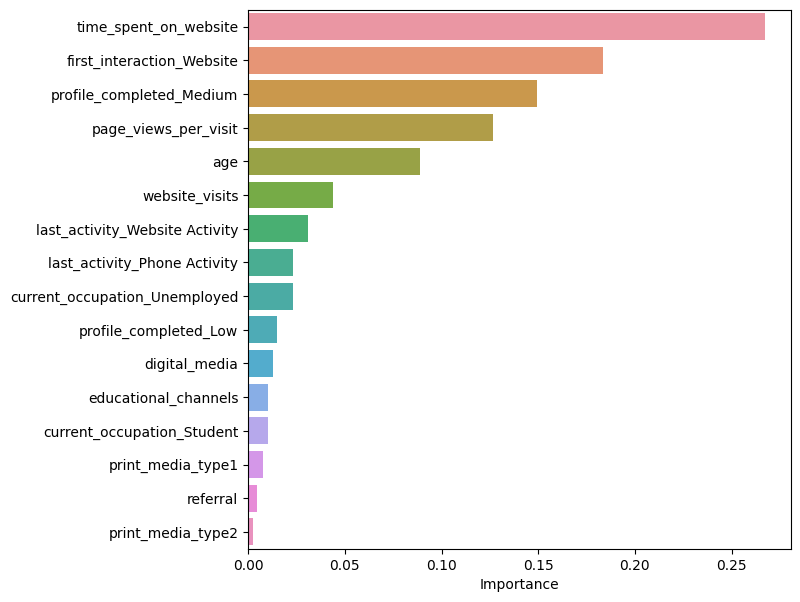

In [466]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (7, 7))

sns.barplot(x=importance_df.Importance,y=importance_df.index)

**Using GridSearch for Hyperparameter Tuning**

In [467]:
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



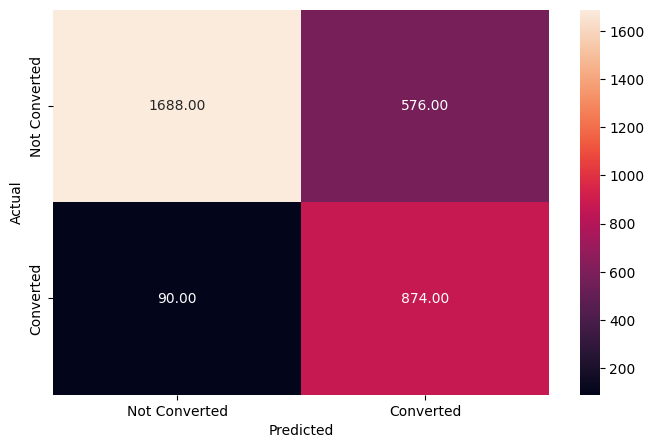

In [468]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



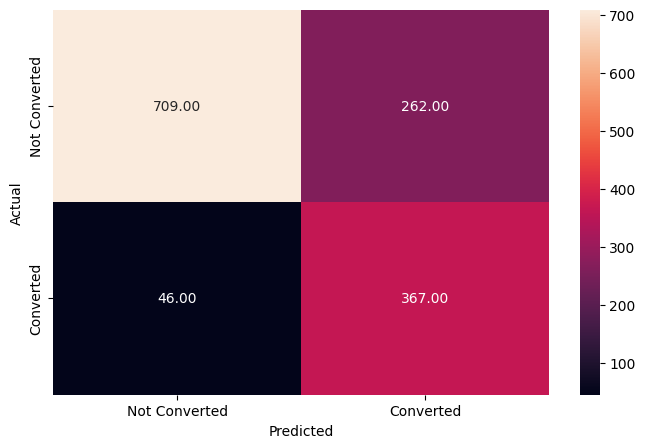

In [469]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [470]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.761269,0.809397,0.777457


**Observations:**


* This model improves recall and looks better than the previous one. 

<Axes: xlabel='Importance'>

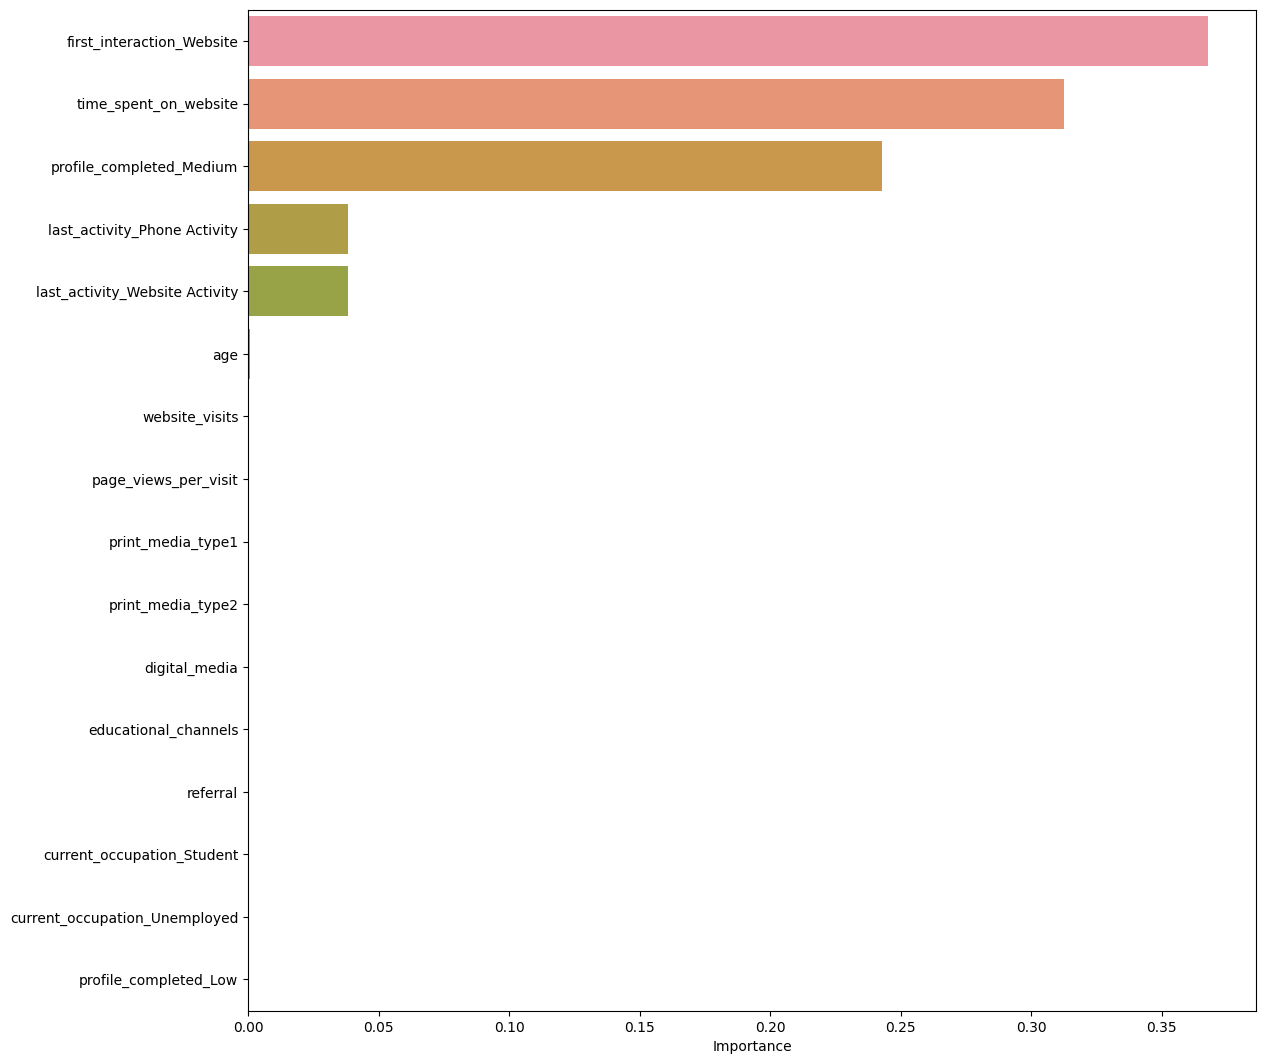

In [471]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

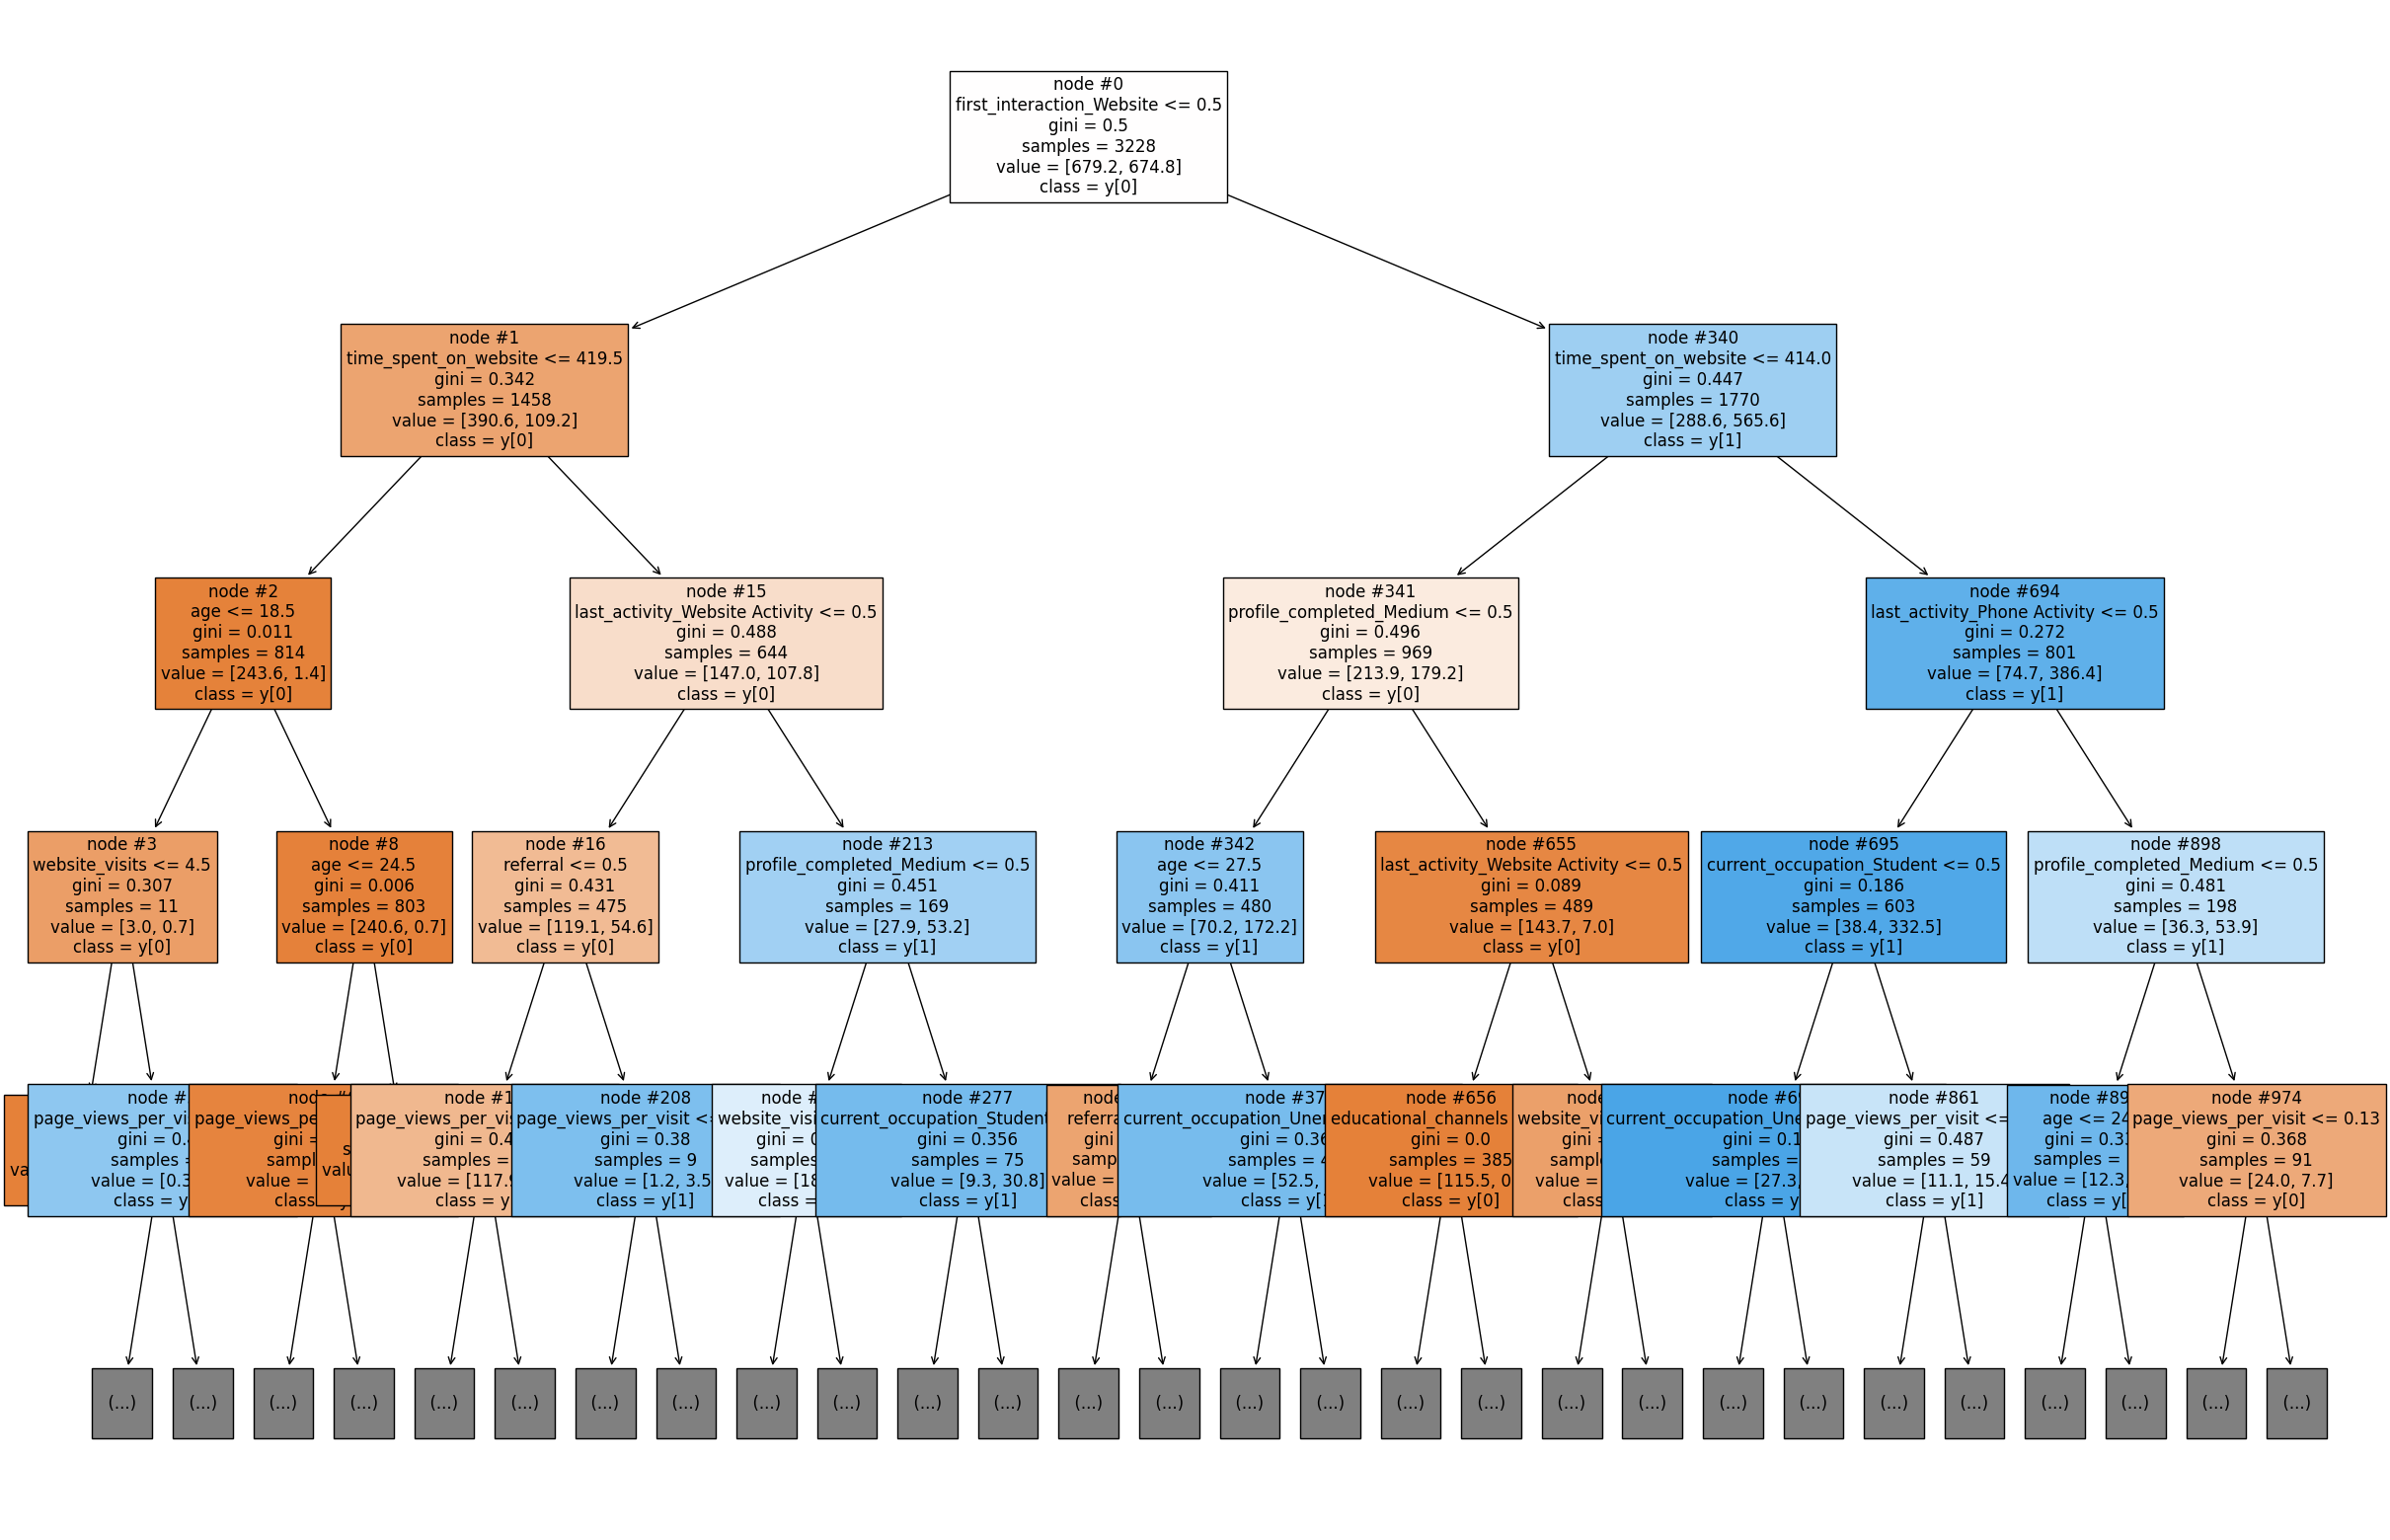

In [472]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

## Building a Random Forest model

In [473]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



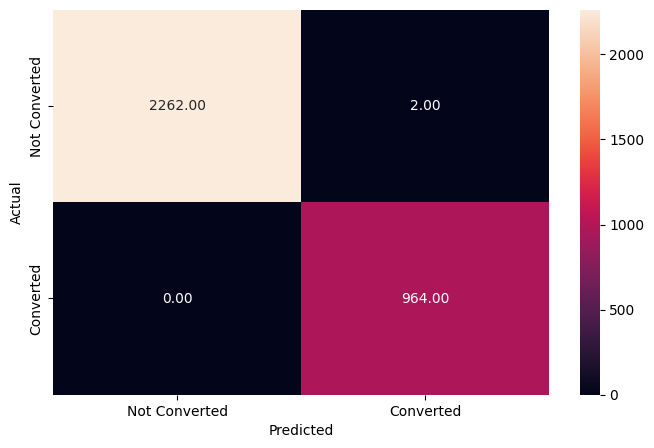

In [474]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       971
           1       0.78      0.71      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



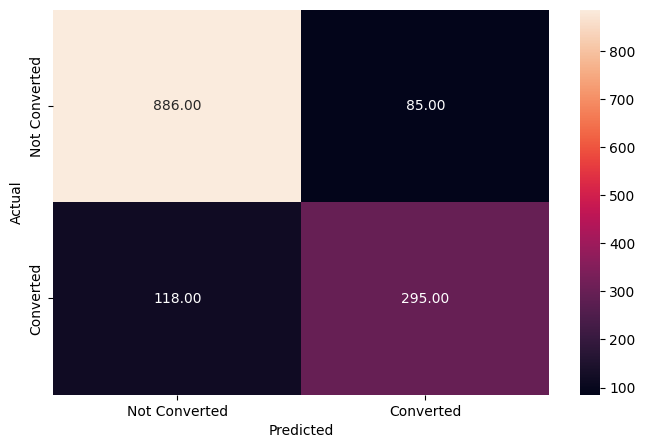

In [475]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [476]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.829393,0.813374,0.853324


**Observations:**

* In terms of precision, recall, and accuracy, this model appears to be superior. However, it falls short in maximizing recall when compared to the second model.

<Axes: xlabel='Importance'>

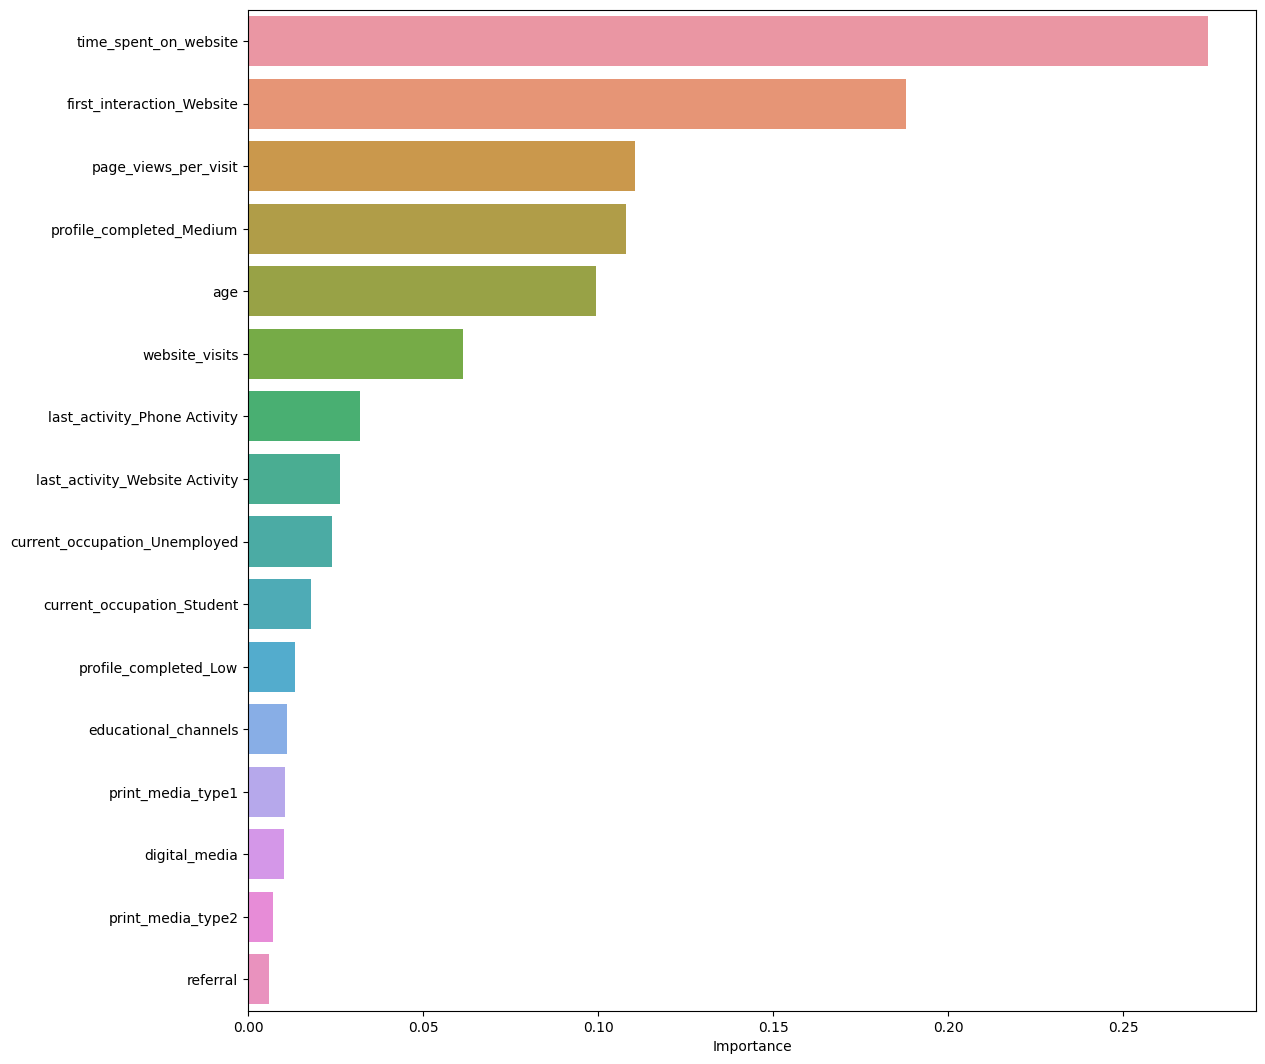

In [477]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Tuning the Random Forest classifier**

In [478]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from

params_rf = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [479]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=6,
                       max_features=0.8, max_samples=0.9, min_samples_leaf=25,
                       n_estimators=110, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2264
           1       0.68      0.89      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



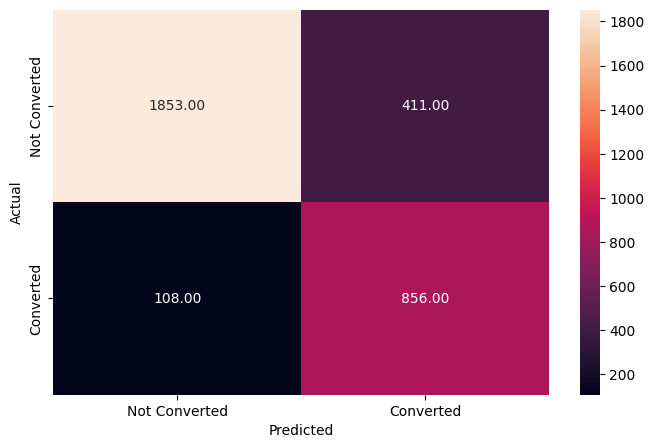

In [480]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       971
           1       0.65      0.85      0.74       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.84      0.82      0.83      1384



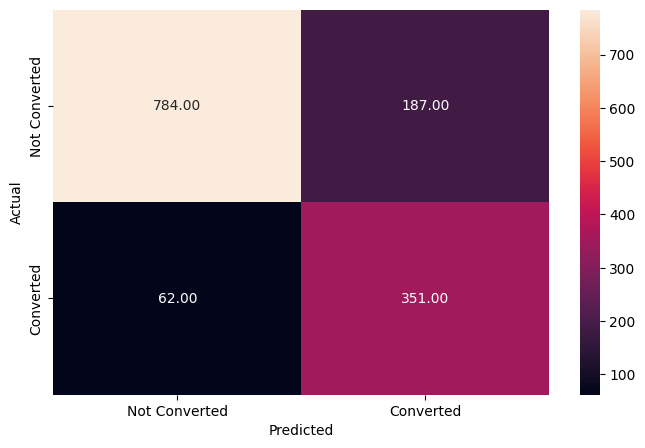

In [481]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [482]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.789565,0.828647,0.820087


Observations:

* The performance of this model shows a slight improvement in recall, but it sacrifices precision and accuracy when compared to the third model.

<Axes: xlabel='Importance'>

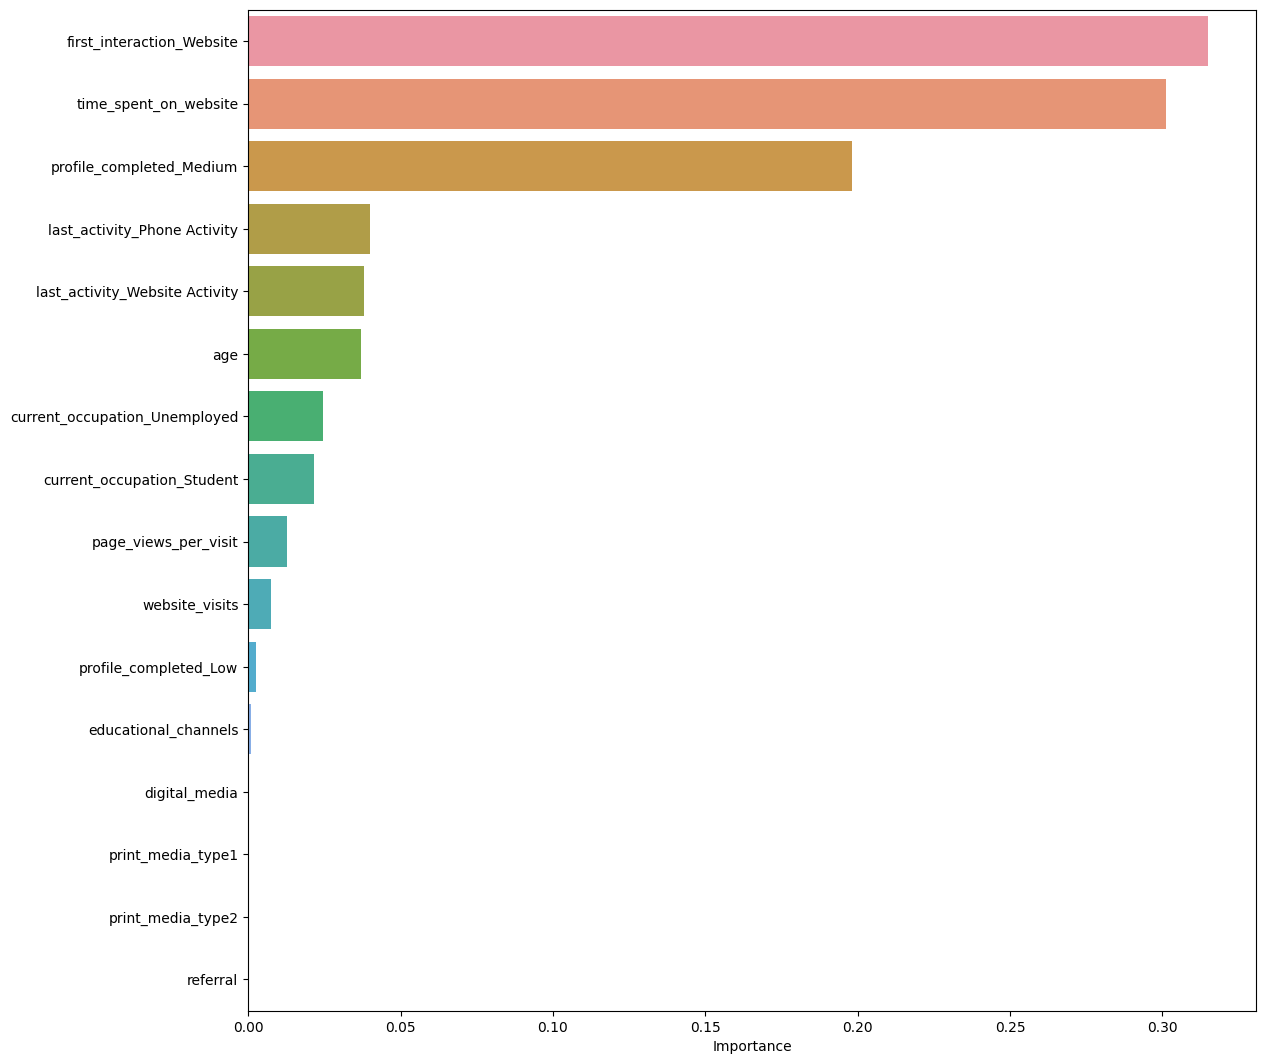

In [483]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y= importance_df.index)

## Actionable Insights and Recommendations

**Model selection**

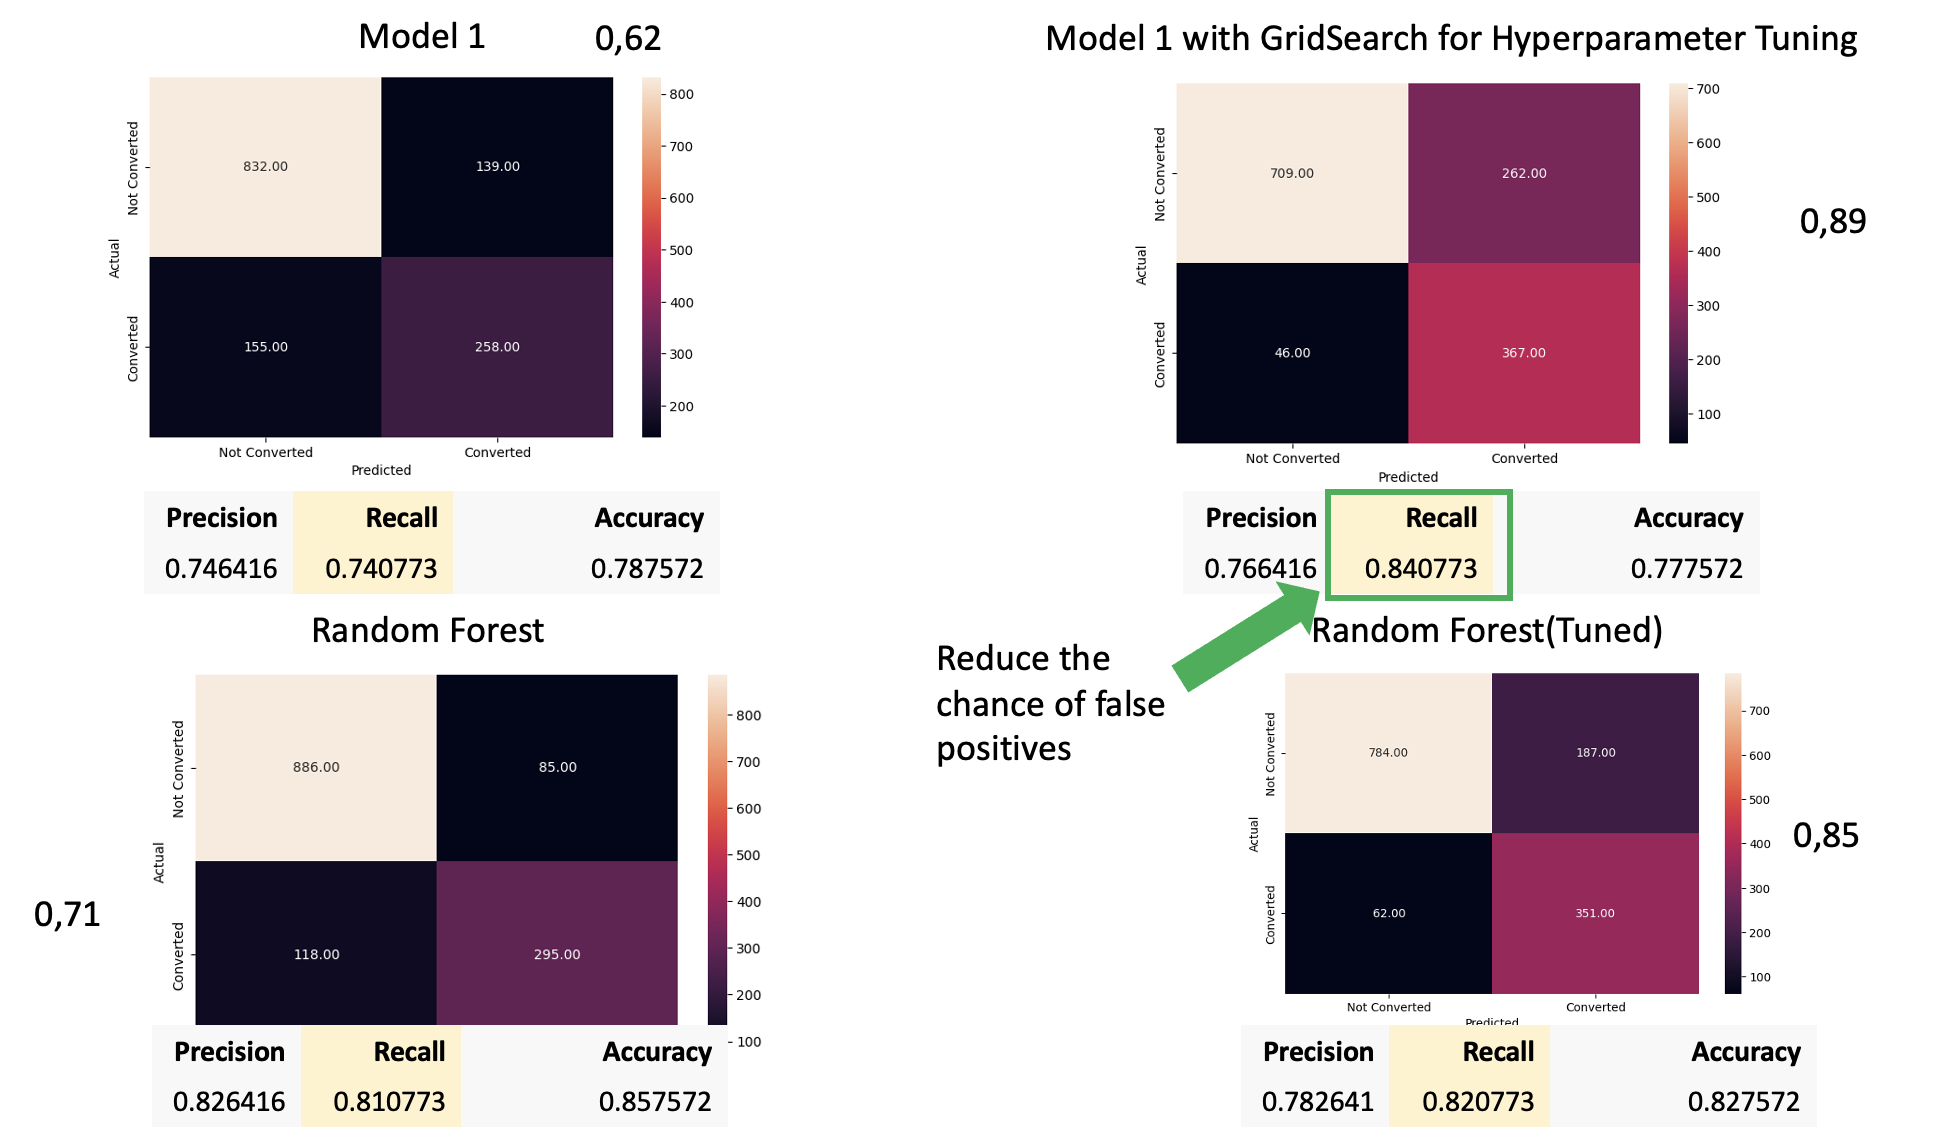


A model with Grid Search for Hyperparameter Tuning is the best model we have got so far, which is giving nearly ~ 89% recall for class 1 on the test data. The company should use it to predict possible future leads.

---



# Business Recommendations


> **Executy Summary**


> Our analysis has revealed that first impressions, communication channels, and frequency of interaction play key roles in determining success. Moreover, a complete and accurate profile is essential and depends on all aforementioned factors. One effective strategy to enhance customer experiences is by implementing various measures such as conducting focus groups, customer journey mapping, and retrospectives. These methods can help identify and address pain points, ultimately resulting in better performance and increased conversions.



---



* Age Diversity: The leads show a wide age range from 18 to 63 years old, indicating high age diversity. However, around 50% of the leads fall between 50 and 60 years old. This suggests that older individuals, especially those in their 50s and 60s, are more interested in online learning, possibly due to the need to balance work and education. It will be interesting to try a A|B Test with new strategies to reach young people and expand the total addressable market.

* The majority of leads (56%) are professionals with a job position, followed by unemployed individuals (31%), and students (12%). This suggests that both professionals and unemployed individuals make up a significant portion of the target market for ExtraaLearn. Exploring deals with training "in company" could be a potential strategy to try. Since professionals represent the largest segment of potential leads, ExtraaLearn should focus on tailoring their programs and marketing strategies to cater to the needs and interests of professionals. Highlighting the benefits of online education for career advancement and skill enhancement could be effective in attracting and converting professional leads.

* Unemployed individuals also present an opportunity for ExtraaLearn. Developing targeted programs or offerings that emphasize the value of upskilling and reskilling during periods of unemployment could be beneficial. Additionally, offering flexible payment options or scholarships for unemployed leads might increase their likelihood of conversion.

* Enhance Website Experience: Given that website interactions yield better results for initial lead engagement, ExtraaLearn should focus on optimizing the website user experience. This includes ensuring the website is user-friendly, informative, and easy to navigate. Incorporating features such as live chat support, personalized recommendations, and clear calls-to-action can help improve lead conversion rates.

* About 50% of the leads have completed their profiles entirely, while another 49% have partially completed their profiles. Only a small percentage of leads have not completed their profiles. This indicates a relatively high level of profile completion, which can provide valuable information for lead qualification and, in fact, helps to achieve conversions. 

* While the mobile app is the second most popular first interaction channel, there may be room for improvement. ExtraaLearn should conduct a thorough analysis of the mobile app's user experience and identify areas for enhancement. This may involve optimizing the app's performance, streamlining navigation, and ensuring a seamless learning experience on mobile devices.

* Encourage Profile Completion: Since lead conversion rates tend to improve with higher profile completion, ExtraaLearn should focus on encouraging leads to complete their profiles. Implementing strategies such as offering incentives, providing personalized recommendations based on profile information, or simplifying the profile completion process can motivate leads to provide more comprehensive details.

* Leverage Referrals: Referrals have shown a higher likelihood of conversion, even when leads have not used them. ExtraaLearn should explore ways to incentivize and encourage existing customers or satisfied leads to refer their network. Implementing referral programs or offering rewards for successful referrals can help amplify the impact of word-of-mouth marketing.

* Evaluate Advertising Channels: While magazines, digital platforms, educational channels, and newspapers have shown an equal chance of conversion, it's important to assess their effectiveness further. ExtraaLearn should analyze the performance of each channel, optimize messaging and targeting, and allocate resources based on their respective ROI. Continuous monitoring and experimentation with different advertising strategies can help identify the most effective channels for lead conversion.


By implementing these recommendations, ExtraaLearn can refine its lead conversion process, optimize resource allocation, and increase the likelihood of converting leads into paid customers.

# Dataset and Model Recommendations 

* Collect Additional Relevant Data: Consider gathering additional data that can provide more insights into lead behavior and preferences. For example, you could collect data on the educational background of leads, their specific areas of interest, previous online learning experiences, or their preferred learning formats. This additional information can help create more informative features and improve the accuracy of the model.

* Capture Lead Engagement Metrics: Include additional metrics that capture lead engagement with ExtraaLearn's platforms. For instance, you could track metrics such as the number of course enrollments, completion rates, participation in webinars or workshops, or engagement with online forums or discussion boards. These metrics can provide valuable indicators of lead interest and commitment, which can be useful for predicting conversion.

* Feature Scaling and Normalization: Perform feature scaling and normalization to ensure that features with different scales or units are on a similar scale. This can prevent certain features from dominating the model due to their larger values. Techniques such as standardization (e.g., scaling features to have zero mean and unit variance) or normalization (e.g., scaling features to a specific range, such as [0, 1]) can be applied.

* Feature Interactions: Explore interactions between features to capture potential synergies or combined effects. For example, you could create new features by multiplying or dividing existing features. Interaction terms can help uncover non-linear relationships or dependencies that might be missed by considering individual features alone.

* Time-Based Features: If available, consider incorporating time-based features that capture the temporal aspect of lead interactions. For example, you could include features such as the time of day, day of the week, or month of the year when the lead interacted with ExtraaLearn. These features can reveal patterns or trends in lead behavior that may influence conversion.


* Handling Outliers: Address outliers in the dataset by either removing them if they are genuine anomalies or transforming them to mitigate their impact on the model. Techniques such as winsorization (replacing extreme values with the nearest non-extreme value) or log transformation can be applied to handle outliers appropriately.

* Feature Selection: Utilize feature selection techniques to identify the most relevant and informative features for the model. This can help reduce dimensionality, improve model interpretability, and mitigate the risk of overfitting. Techniques such as correlation analysis, recursive feature elimination, or regularization-based methods (e.g., Lasso or Ridge regression) can aid in feature selection.

**Other Machine Learning Models to try:**

* Logistic Regression: Logistic regression is a popular and interpretable model for binary classification problems. It could work well in this case.

* Neural Networks: Deep learning models like Multilayer Perceptron (MLP) or Convolutional Neural Networks (CNN) can be used for lead conversion prediction. 